## 2D Features

In [1]:
# Imports
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt

### Image Derivatives

#### Sobel Filter

In [8]:
# Visualize results
def visual_results(image, filt_x, filt_y, grad_amp, labels):
    plt.subplot(2,2,1)
    plt.imshow(image, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title(labels[0])
    plt.subplot(2,2,2)
    plt.imshow(grad_amp, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title(labels[1])
    plt.subplot(2,2,3)
    plt.imshow(filt_x, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title(labels[2])
    plt.subplot(2,2,4)
    plt.imshow(filt_y, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title(labels[3])

# Import image
image= cv2.imread("../data/raw/img/01.png", cv2.IMREAD_GRAYSCALE)

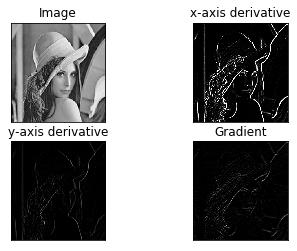

In [9]:
# Sobel Filter
# x-direction derivative (3x3)
S_x= 1/9* np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
# y-direction derivative (3x3)
S_y= 1/9* np.array([[1,2,1], [0,0,0], [-1,-2,-1]])

# Convolve filter over image
filt_x= cv2.filter2D(image, -1, S_x)
filt_y= cv2.filter2D(image, -1, S_y)

# Compute gradient amplitude
grad_amp_squared= cv2.add(cv2.multiply(filt_x,filt_x),
                               cv2.multiply(filt_y,filt_y))

# Visualize results
visual_results(image, filt_x, filt_y, grad_amp_squared, ["Image", "x-axis derivative", "y-axis derivative", "Gradient"])


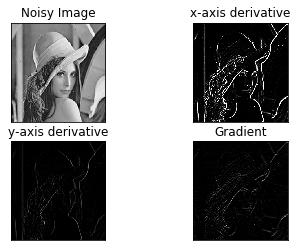

In [25]:
# Sobel on image with noise

# Gausian Noise
def gauss_noise(img, noise_x, noise_y, noise_size):
    """
    Adds gaussian noise to img.
    int noise_x, noise_y: image coordinates to add noise
    int noise_size: number of noise pixels
    """
    img_mean= np.mean(img)
    sigma= 10
    # Gaussian pixels
    gauss_pix= np.random.normal(img_mean,sigma,noise_size)
    img[noise_x, noise_y]= gauss_pix


N,D= image.shape
# Noise size- Number of noise pixels
noise_size= (N*D)//1000   
# Noise indices
# Limit x axis indices to N
noise_x= np.random.randint(0,N,noise_size)
# Limit y axis indices to D
noise_y= np.random.randint(0,D,noise_size)

# Noisy image
image_noisy= image.copy()
gauss_noise(image_noisy, noise_x, noise_y, noise_size)

# Convolve filter over image
filt_x= cv2.filter2D(image_noisy, -1, S_x)
filt_y= cv2.filter2D(image_noisy, -1, S_y)

# Compute gradient amplitude
grad_amp_squared= cv2.add(cv2.multiply(filt_x,filt_x),
                               cv2.multiply(filt_y,filt_y))

# Visualize results
visual_results(image_noisy, filt_x, filt_y, grad_amp_squared, ["Noisy Image", "x-axis derivative", "y-axis derivative", "Gradient"])